In [1]:
import requests

def download_image(image_url, file_name):
  """Downloads an image from a URL and saves it to a file.

  Args:
    image_url: The URL of the image to download.
    file_name: The name of the file to save the image to.
  """
  response = requests.get(image_url, stream=True)
  if response.status_code == 200:
    with open(file_name, 'wb') as f:
      for chunk in response.iter_content(1024):
        f.write(chunk)
    print(f"Image downloaded successfully to {file_name}")
  else:
    print(f"Failed to download image. Status code: {response.status_code}")

# Replace with the URL of the image you want to download
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/1200px-Python-logo-notext.svg.png"

# Replace with the desired file name
file_name = "downloaded_image.png"

download_image(image_url, file_name)


Image downloaded successfully to downloaded_image.png


In [3]:
!pip install opencv-python scikit-image

import cv2
from skimage.feature import graycomatrix, graycoprops #Fixed typo in function names
import numpy as np

# Load the downloaded image
img = cv2.imread('/content/im_1.png', cv2.IMREAD_GRAYSCALE)

# Define the distances and angles for GLCM
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Calculate the GLCM
glcm = graycomatrix(img, distances, angles, levels=256, symmetric=True, normed=True)

# Calculate GLCM properties
contrast = graycoprops(glcm, 'contrast')
dissimilarity = graycoprops(glcm, 'dissimilarity')
homogeneity = graycoprops(glcm, 'homogeneity')
energy = graycoprops(glcm, 'energy')
correlation = graycoprops(glcm, 'correlation')
ASM = graycoprops(glcm, 'ASM')

print("Contrast:", contrast)
print("Dissimilarity:", dissimilarity)
print("Homogeneity:", homogeneity)
print("Energy:", energy)
print("Correlation:", correlation)
print("ASM:", ASM)

Contrast: [[ 63.0463509  121.6978661   70.93127987 134.80237236]]
Dissimilarity: [[5.43707174 7.55975172 5.77213775 7.98670026]]
Homogeneity: [[0.22128846 0.17445951 0.21464889 0.16329971]]
Energy: [[0.01531237 0.01314431 0.01503988 0.01272249]]
Correlation: [[0.99013211 0.98095539 0.98889734 0.9789046 ]]
ASM: [[0.00023447 0.00017277 0.0002262  0.00016186]]


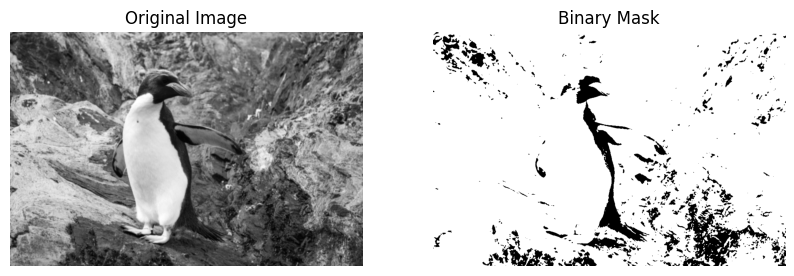

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Load your grayscale image
image_path = '/content/im_1.png'  # Change this to your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    raise ValueError(f"Image not found or unable to load at {image_path}")

# Ensure the image is a 2D array
if img.ndim != 2:
    raise ValueError("The loaded image is not a 2D array (grayscale).")

# Calculate GLCM features
distances = [1]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm = graycomatrix(img, distances, angles, levels=256, symmetric=True, normed=True)

# Extract a feature (e.g., contrast) to use for thresholding
contrast = graycoprops(glcm, 'contrast')

# Use the mean contrast across all angles for thresholding
mean_contrast = np.mean(contrast)

# Set a threshold based on the mean contrast value
threshold = 0.5 * mean_contrast  # Adjust this as necessary

# Create a binary mask based on the threshold
mask = img > threshold

# Convert mask to uint8 for display
binary_mask = mask.astype(np.uint8) * 255  # Scale to 0-255 for display

# Display the original image and the binary mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Mask")
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')

plt.show()


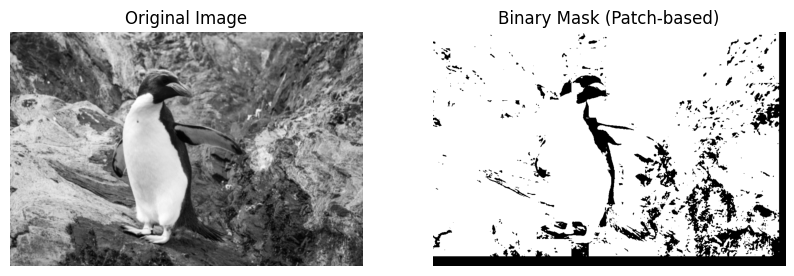

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Load your grayscale image
image_path = '/content/im_1.png'  # Change this to your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    raise ValueError(f"Image not found or unable to load at {image_path}")

# Ensure the image is a 2D array
if img.ndim != 2:
    raise ValueError("The loaded image is not a 2D array (grayscale).")

# Set patch size
patch_size = 50  # Define the patch size (e.g., 50x50)
h, w = img.shape
binary_mask = np.zeros_like(img)  # Initialize a mask for the whole image

# Loop over patches in the image
for i in range(0, h, patch_size):
    for j in range(0, w, patch_size):
        # Extract the patch
        patch = img[i:i+patch_size, j:j+patch_size]

        # Ensure the patch has enough size (in case of border patches)
        if patch.shape[0] != patch_size or patch.shape[1] != patch_size:
            continue

        # Calculate GLCM for the patch
        distances = [1]
        angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
        glcm = graycomatrix(patch, distances, angles, levels=256, symmetric=True, normed=True)

        # Extract the contrast property
        contrast = graycoprops(glcm, 'contrast')

        # Use the mean contrast across all angles for thresholding
        mean_contrast = np.mean(contrast)

        # Set a threshold based on the mean contrast value
        threshold = 0.5 * mean_contrast  # Adjust this as necessary

        # Create a binary mask for the patch based on the threshold
        patch_mask = patch > threshold

        # Convert mask to uint8 for combining with the main binary mask
        binary_mask[i:i+patch_size, j:j+patch_size] = patch_mask.astype(np.uint8) * 255

# Display the original image and the binary mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Mask (Patch-based)")
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')

plt.show()


LBP Histogram: [227736 264133 199691      0]


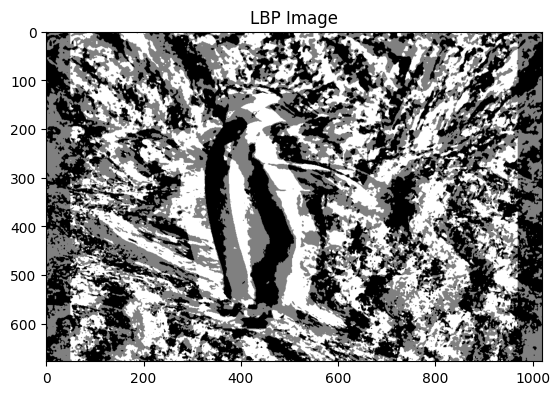

In [10]:
from skimage.feature import local_binary_pattern

# Define the radius and number of points for LBP
radius = 50
n_points = 2

# Calculate LBP
lbp = local_binary_pattern(img, n_points, radius, method='uniform')

# You can then analyze the LBP features, for example, by calculating a histogram:
from collections import Counter
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

print("LBP Histogram:", hist)

# prompt: show img of LBP

import matplotlib.pyplot as plt

plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.show()



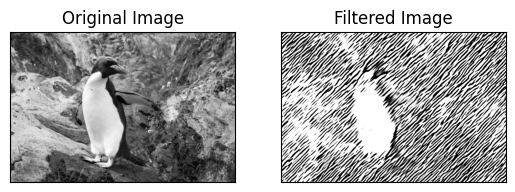

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the downloaded image
img = cv2.imread('im_1.png', cv2.IMREAD_GRAYSCALE)

# Define the parameters for Gabor filters
ksize = 120  # Kernel size
sigma = 5  # Standard deviation of the Gaussian kernel
theta = np.pi / 4  # Orientation of the Gabor filter
lamda = 10  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create the Gabor kernel
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, psi, ktype=cv2.CV_32F)

# Apply the Gabor filter to the image
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, gabor_kernel)

# Display the original and filtered images
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.0 MB/s eta 0:00:00


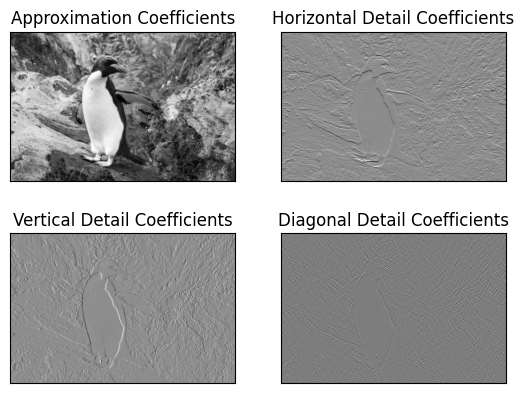

In [14]:
!pip install PyWavelets #Install the PyWavelets library, which includes pywt

import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the downloaded image
img = cv2.imread('im_1.png', cv2.IMREAD_GRAYSCALE)

# Apply wavelet transform
coeffs = pywt.dwt2(img, 'haar')  # Use 'haar' wavelet for example
cA, (cH, cV, cD) = coeffs

# Display the approximation and detail coefficients
plt.subplot(221), plt.imshow(cA, cmap='gray')
plt.title('Approximation Coefficients'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(cH, cmap='gray')
plt.title('Horizontal Detail Coefficients'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(cV, cmap='gray')
plt.title('Vertical Detail Coefficients'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(cD, cmap='gray')
plt.title('Diagonal Detail Coefficients'), plt.xticks([]), plt.yticks([])
plt.show()

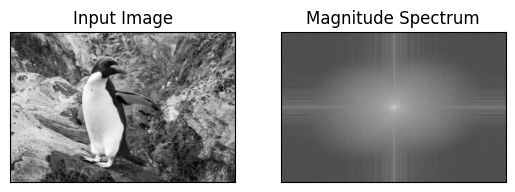

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load the downloaded image
img = cv2.imread('im_1.png', cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = np.fft.fft2(img)
fshift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display the original image and its magnitude spectrum
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


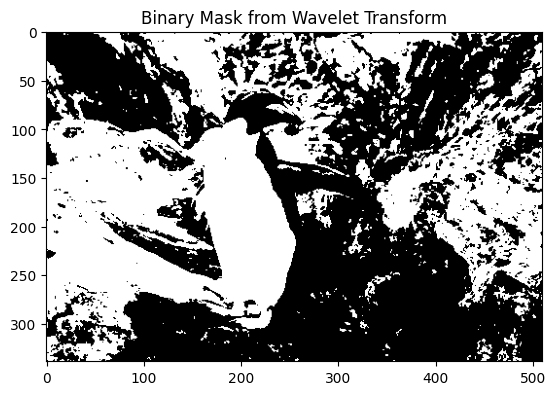

In [16]:
import numpy as np

# Assuming 'cA', 'cH', 'cV', 'cD' are the wavelet coefficients from the previous code

# Example: Create a binary mask based on the approximation coefficients
threshold = np.mean(cA)  # You can adjust the threshold as needed
binary_mask = (cA > threshold).astype(np.uint8)

# Display the binary mask
plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask from Wavelet Transform')
plt.show()


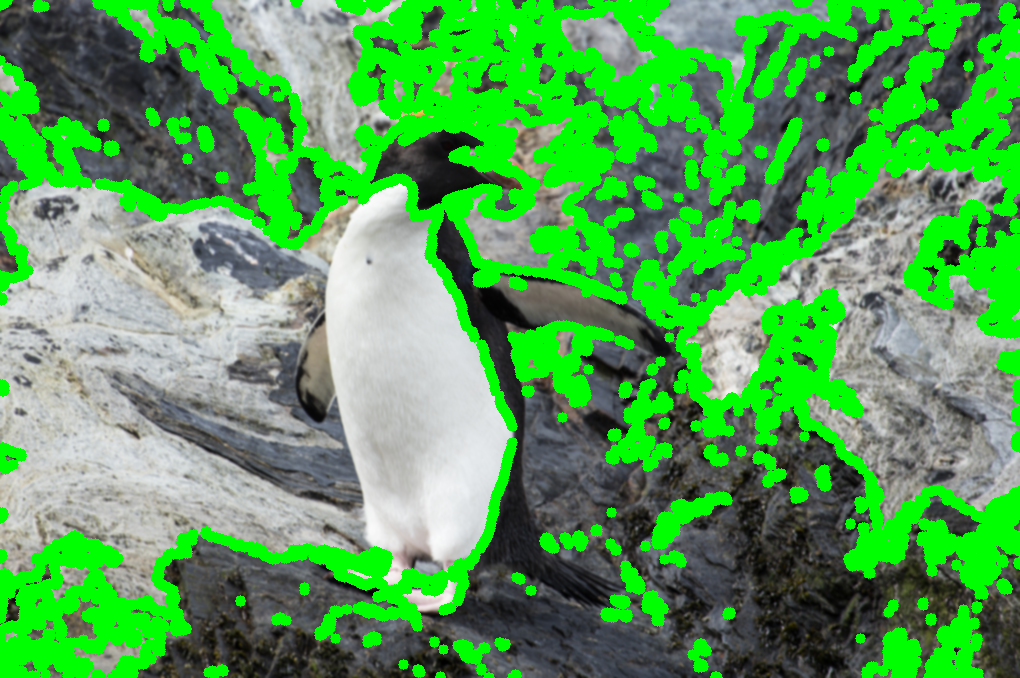

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/im_1.png')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract anchor pixels
anchor_pixels = []
for contour in contours:
    for point in contour:
        anchor_pixels.append(tuple(point[0]))

# Optional: Mark anchor pixels on the image
for pixel in anchor_pixels:
    cv2.circle(image, pixel, 5, (0, 255, 0), -1)  # Draw green circles on anchor pixels

# Show the result
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

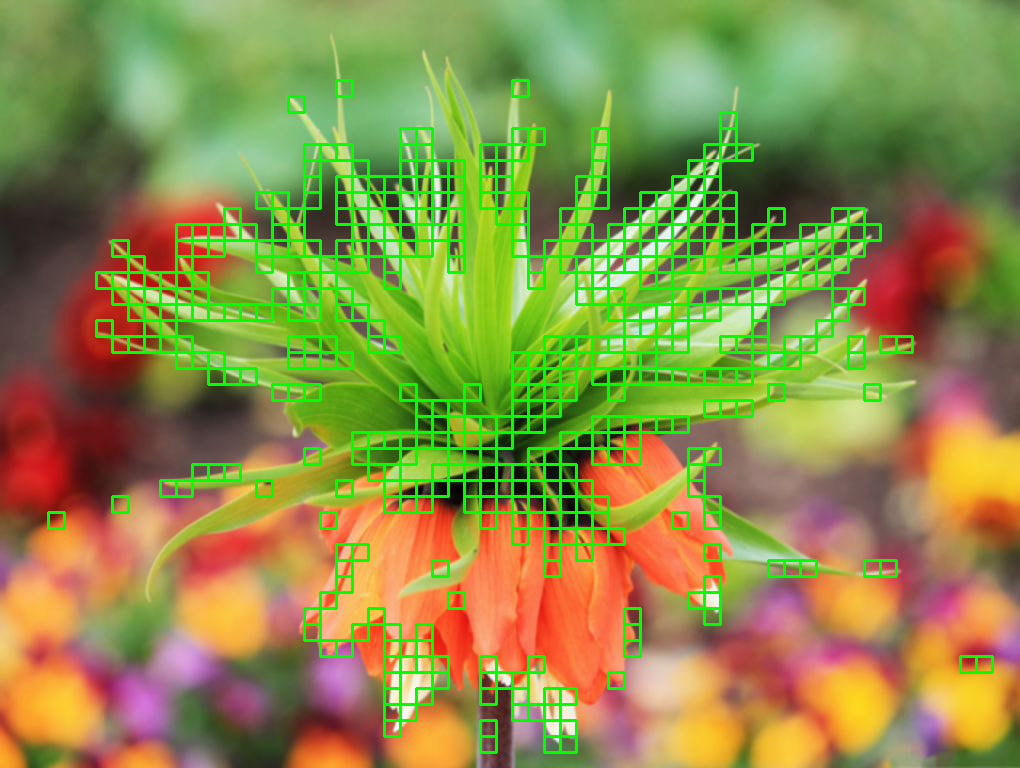

In [32]:
import cv2
import numpy as np

def extract_data_rich_patches(image, patch_size=16, threshold=50):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the gradient magnitude
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    grad_magnitude = cv2.magnitude(grad_x, grad_y)

    # Define a list to store anchor patches
    anchor_patches = []

    # Slide a window across the image
    for y in range(0, gray.shape[0] - patch_size, patch_size):
        for x in range(0, gray.shape[1] - patch_size, patch_size):
            # Extract patch
            patch = grad_magnitude[y:y + patch_size, x:x + patch_size]
            # Compute the mean gradient of the patch
            mean_gradient = np.mean(patch)

            # Select patches based on the threshold
            if mean_gradient > threshold:
                anchor_patches.append((x, y, patch))

    return anchor_patches

# Load the image - make sure the path is correct and the file exists
image = cv2.imread('/content/im_3.png')

if image is None:
  print('Image not loaded successfully. Check the file path.')
else:
  # Extract data-rich patches
  anchors = extract_data_rich_patches(image)

  # Visualize selected anchor patches
  for (x, y, patch) in anchors:
    cv2.rectangle(image, (x, y), (x + 16, y + 16), (0, 255, 0), 2)

  # Show the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

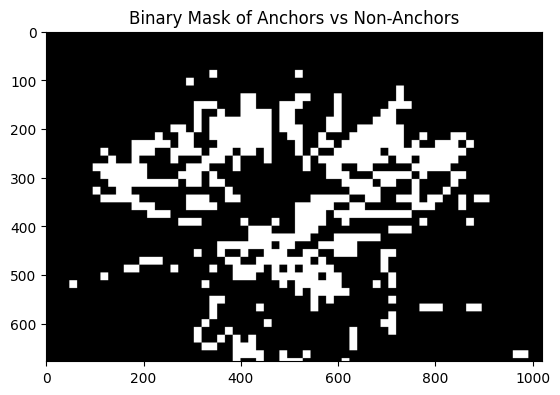

In [33]:
# Assuming 'anchors' contains the list of (x, y, patch) tuples from the previous code

# Create a blank mask the same size as the image
mask = np.zeros_like(img, dtype=np.uint8)

# Set the pixels corresponding to anchor patches to 255 (white)
for (x, y, _) in anchors:
    mask[y:y + 16, x:x + 16] = 255  # Assuming patch_size is 16

# Display the binary mask
plt.imshow(mask, cmap='gray')
plt.title('Binary Mask of Anchors vs Non-Anchors')
plt.show()


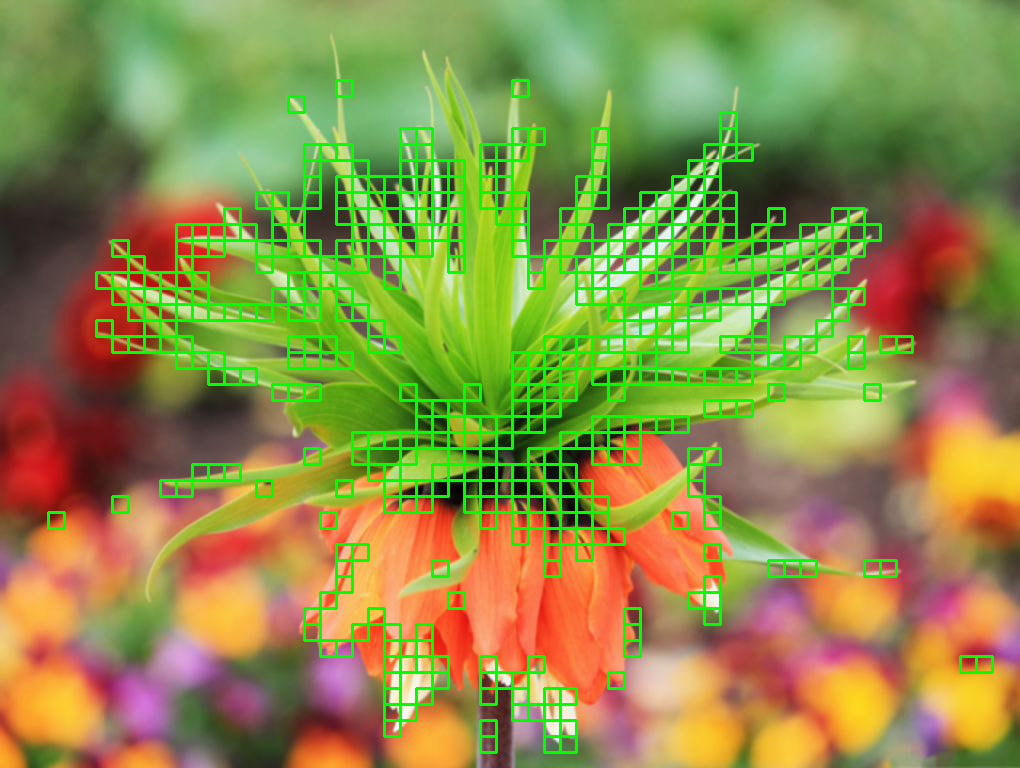

In [25]:
import cv2
import numpy as np

def extract_data_rich_patches(image, patch_size=16, threshold=50):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute the gradient magnitude
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    grad_magnitude = cv2.magnitude(grad_x, grad_y)

    # Define a list to store anchor patches
    anchor_patches = []

    # Slide a window across the image
    for y in range(0, gray.shape[0] - patch_size, patch_size):
        for x in range(0, gray.shape[1] - patch_size, patch_size):
            # Extract patch
            patch = grad_magnitude[y:y + patch_size, x:x + patch_size]
            # Compute the mean gradient of the patch
            mean_gradient = np.mean(patch)

            # Select patches based on the threshold
            if mean_gradient > threshold:
                anchor_patches.append((x, y, patch))

    return anchor_patches

# Load the image - make sure the path is correct and the file exists
image = cv2.imread('/content/im_3.png')

if image is None:
  print('Image not loaded successfully. Check the file path.')
else:
  # Extract data-rich patches
  anchors = extract_data_rich_patches(image)

  # Visualize selected anchor patches
  for (x, y, patch) in anchors:
    cv2.rectangle(image, (x, y), (x + 16, y + 16), (0, 255, 0), 2)

  # Show the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

def calculate_entropy(patch):
    histogram, _ = np.histogram(patch, bins=256, range=(0, 256))
    histogram = histogram / histogram.sum()  # Normalize
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))  # Avoid log(0)
    return entropy

def extract_entropy_based_patches(image, patch_size=64, threshold=5.0):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    anchor_patches = []

    for y in range(0, gray.shape[0] - patch_size, patch_size):
        for x in range(0, gray.shape[1] - patch_size, patch_size):
            patch = gray[y:y + patch_size, x:x + patch_size]
            entropy = calculate_entropy(patch)

            if entropy > threshold:
                anchor_patches.append((x, y, patch))

    return anchor_patches

# Load and process image
image = cv2.imread('/content/im_3.png')
anchors = extract_entropy_based_patches(image)


In [ ]:
# prompt: show img with anchors

# Visualize selected anchor patches
for (x, y, patch) in anchors:
  cv2.rectangle(image, (x, y), (x + 16, y + 16), (0, 255, 0), 2)

# Show the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from cv2 import saliency

# Load the image
image = cv2.imread('/content/im_1.png')

# Create a saliency detector
saliency_detector = saliency.StaticSaliencyFineGrained_create()
_, saliency_map = saliency_detector.computeSaliency(image) # extract the numpy array from the tuple

# Threshold the saliency map to find rich patches
_, thresh = cv2.threshold(saliency_map.astype(np.uint8), 128, 255, cv2.THRESH_BINARY)

# Find contours or regions in the saliency map
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# prompt: show the saliency_map

cv2_imshow(contours)


In [ ]:
import pywt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def create_binary_map_with_dwt2(image, patch_size=64, wavelet='haar', threshold_type='mean'):
  """
  Creates a binary map using DWT2 and patches.

  Args:
      image: The input image (BGR).
      patch_size: Size of the patches.
      wavelet: Wavelet type for DWT2.
      threshold_type: Method for calculating the threshold ('mean', 'median', or 'otsu').

  Returns:
      A binary map of the image.
  """
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  binary_map = np.zeros_like(gray, dtype=np.uint8)

  for y in range(0, gray.shape[0] - patch_size + 1, patch_size):
    for x in range(0, gray.shape[1] - patch_size + 1, patch_size):
      patch = gray[y:y + patch_size, x:x + patch_size]
      coeffs = pywt.dwt2(patch, wavelet)
      cA, (cH, cV, cD) = coeffs

      if threshold_type == 'mean':
        threshold = np.mean(cA)
      elif threshold_type == 'median':
        threshold = np.median(cA)
      elif threshold_type == 'otsu':
        _, threshold = cv2.threshold(cA, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
      else:
        raise ValueError("Invalid threshold type.")

      binary_patch = (cA > threshold).astype(np.uint8) * 255
      #Resize binary patch to match original patch size
      binary_patch = cv2.resize(binary_patch, (patch_size, patch_size), interpolation=cv2.INTER_NEAREST)
      binary_map[y:y + patch_size, x:x + patch_size] = binary_patch

  return binary_map

# Example usage:
image = cv2.imread('/content/im_1.png')
binary_map = create_binary_map_with_dwt2(image, patch_size=64)

cv2_imshow(binary_map)
cv2.waitKey(0)
cv2.destroyAllWindows()